Time (s),pip2(head~U),pip2(head~P),ap2(m2muh),ap2(sy),kin(ap),kin(pi),syn(ap),syn(pi),pip2(head~P!1).ap2(m2muh!1),kin(pi!1).pip2(head~U!1),kin(ap!1).ap2(sy!1),syn(pi!1).pip2(head~P!1),syn(ap!1).ap2(sy!1)

In [1]:
import numpy as np 
import matplotlib as plt 
import pandas as pd
import seaborn as sns
import re
import os.path

In [32]:
# define volume for parm file
V = 0

parm = open('parms.inp', 'r')

for line in parm:
    
    if 'WaterBox' in line:
        linesplit = line.split(' ')
        #print(linesplit)
        dim = re.split(',',linesplit[-3])
        print(type(dim))

        dim1 = dim[0][0]
        
        V = int(dim[0][1:])*int(dim[1])*int(dim[2][:-1]) * 1e-9


V 



<class 'list'>


0.0756999

In [2]:
file = open('copy_numbers_time.dat', 'r')

count = 0
for line in file:
    linesplit = line.split(',')
    if count == 0:
        copynumbers = {k:0 for k in linesplit}
    break 





In [2]:
df = pd.read_csv('copy_numbers_time.dat')

df

,Time (s),pip2(head~U),pip2(head~P),ap2(m2muh),ap2(sy),kin(ap),kin(pi),syn(ap),syn(pi),pip2(head~P!1).ap2(m2muh!1),kin(pi!1).pip2(head~U!1),kin(ap!1).ap2(sy!1),syn(pi!1).pip2(head~P!1),syn(ap!1).ap2(sy!1)
0,0.000000,3100,0,443,443,200,200,134,134,0,0,0,0,0
1,0.000005,3098,0,443,443,200,198,134,134,0,2,0,0,0
2,0.000010,3097,0,443,443,200,197,134,134,0,3,0,0,0
3,0.000015,3094,0,443,443,200,194,134,134,0,6,0,0,0
4,0.000020,3093,0,443,443,200,193,134,134,0,7,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457088,7.285440,1010,1320,0,118,3,1,6,6,443,199,197,128,128
1457089,7.285440,1010,1320,0,118,3,1,6,6,443,199,197,128,128
1457090,7.285450,1010,1320,0,118,3,1,6,6,443,199,197,128,128
1457091,7.285450,1010,1320,0,118,3,1,6,6,443,199,197,128,128


<AxesSubplot:xlabel='Time (s)'>

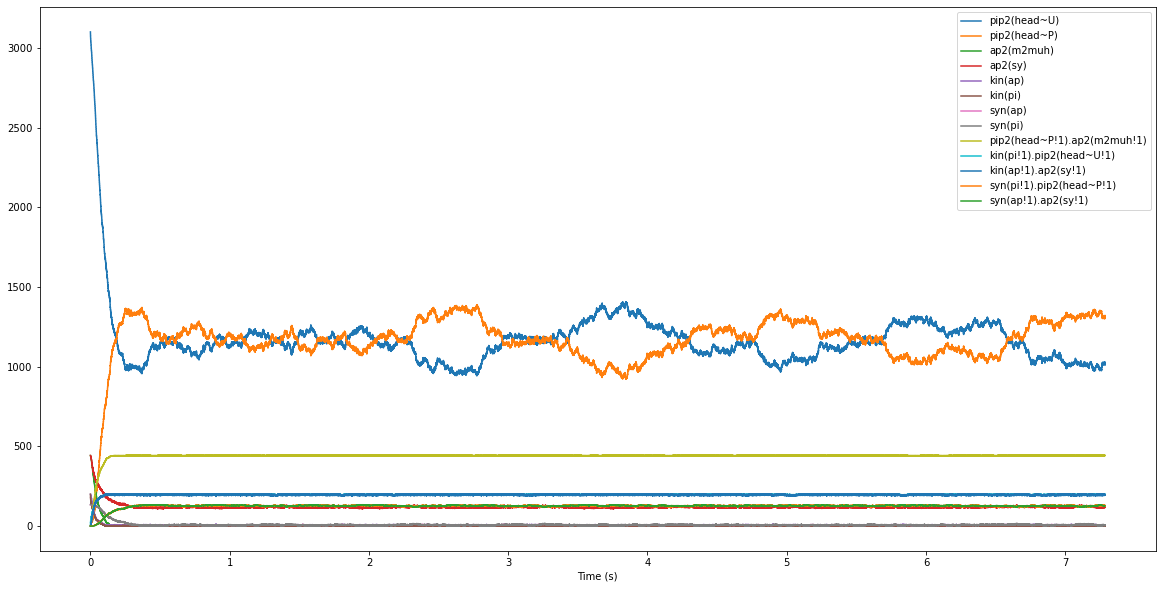

In [3]:
df.plot.line(x='Time (s)', figsize=(20,10))

In [37]:
def concentration(copies, V):

    moles = copies/6.023e17 #converts copies to micromoles
    V = V/1e15 #convert volume in um^-3 to liters
    conc = moles/V #divide micromoles by volume
    
    return conc


In [42]:
def df_pretty(df, V):
    newdf = pd.DataFrame()
    newdf['Time (us)'] = df['Time (s)'].apply(lambda x: x*1e6)
    newdf['PIP'] = df.iloc[:,1].apply(lambda copies: concentration(copies, V))
    newdf['PIP2'] = df.iloc[:,2].apply(lambda copies: concentration(copies, V))
    ##newdf['A'] = df.iloc[:,3].apply(lambda copies: concentration(copies, V))
    #newdf['A'] = (df['ap2(m2muh)'][0] - df.iloc[:,9] - df.iloc[:,11] - df.iloc[:,13])
    newdf['K'] = df[['kin(ap)','kin(pi)']].min(axis=1)
    newdf['K'] = newdf['K'].apply(lambda copies: concentration(copies, V))
    newdf['P'] = df[['syn(ap)','syn(pi)']].min(axis=1)
    newdf['P'] = newdf['P'].apply(lambda copies: concentration(copies, V))
    newdf['LK'] = df['kin(pi!1).pip2(head~U!1)'] - df['kin(ap!1).ap2(sy!1)']
    newdf['LK'] = newdf['LK'].apply(lambda copies: concentration(copies, V))
    newdf['LpP'] = df['syn(pi!1).pip2(head~P!1)'] - df['syn(ap!1).ap2(sy!1)']
    newdf['LpP'] = newdf['LpP'].apply(lambda copies: concentration(copies, V))
    newdf['A'] = df[['ap2(m2muh)','ap2(sy)']].min(axis=1)
    newdf['A'] = newdf['A'].apply(lambda copies: concentration(copies, V))

    ## difference between LpA and AK or AP because enzyme can only bind LpA
    newdf['LpA'] = df['pip2(head~P!1).ap2(m2muh!1)'] - df['kin(ap!1).ap2(sy!1)'] - df['syn(ap!1).ap2(sy!1)']
    newdf['LpA'] = newdf['LpA'].apply(lambda copies: concentration(copies, V))

    newdf['LpAK'] = df['kin(ap!1).ap2(sy!1)']
    newdf['LpAK'] = newdf['LpAK'].apply(lambda copies: concentration(copies, V))

    newdf['LpAP'] = df['syn(ap!1).ap2(sy!1)']
    newdf['LpAP'] = newdf['LpAP'].apply(lambda copies: concentration(copies, V))

    #newdf['LpAPLp'] = df['syn(ap!1).ap2(sy!1)']
    #newdf['LpAPLp'] = newdf['LpAPLp'].apply(lambda copies: concentration(copies, V))
    

    return newdf 


In [43]:
newdf = df_pretty(df, V)

In [44]:
newdf

,Time (us),PIP,PIP2,K,P,LK,LpP,A,LpA,LpAK,LpAP
0,0.0,67.991328,0.000000,4.386537,2.938980,0.000000,0.0,9.71618,0.000000,0.000000,0.000000
1,5.0,67.947463,0.000000,4.342672,2.938980,0.043865,0.0,9.71618,0.000000,0.000000,0.000000
2,10.0,67.925530,0.000000,4.320739,2.938980,0.065798,0.0,9.71618,0.000000,0.000000,0.000000
3,15.0,67.859732,0.000000,4.254941,2.938980,0.131596,0.0,9.71618,0.000000,0.000000,0.000000
4,20.0,67.837799,0.000000,4.233008,2.938980,0.153529,0.0,9.71618,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
1457088,7285440.0,22.152013,28.951146,0.021933,0.131596,0.043865,0.0,0.00000,2.588057,4.320739,2.807384
1457089,7285440.0,22.152013,28.951146,0.021933,0.131596,0.043865,0.0,0.00000,2.588057,4.320739,2.807384
1457090,7285450.0,22.152013,28.951146,0.021933,0.131596,0.043865,0.0,0.00000,2.588057,4.320739,2.807384
1457091,7285450.0,22.152013,28.951146,0.021933,0.131596,0.043865,0.0,0.00000,2.588057,4.320739,2.807384


In [52]:
os.path.dirname(__file__)

NameError: name '__file__' is not defined

Text(0, 0.5, 'Concentration (uM)')

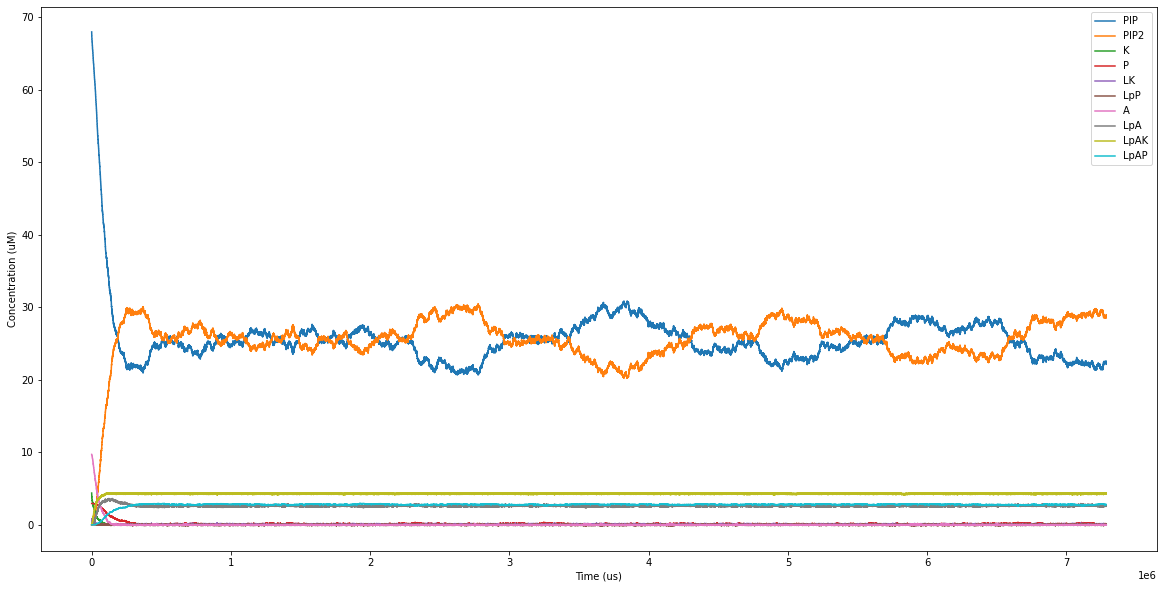

In [53]:
ax = newdf.plot.line(x = 'Time (us)', figsize=(20,10))
ax.set_ylabel('Concentration (uM)')
